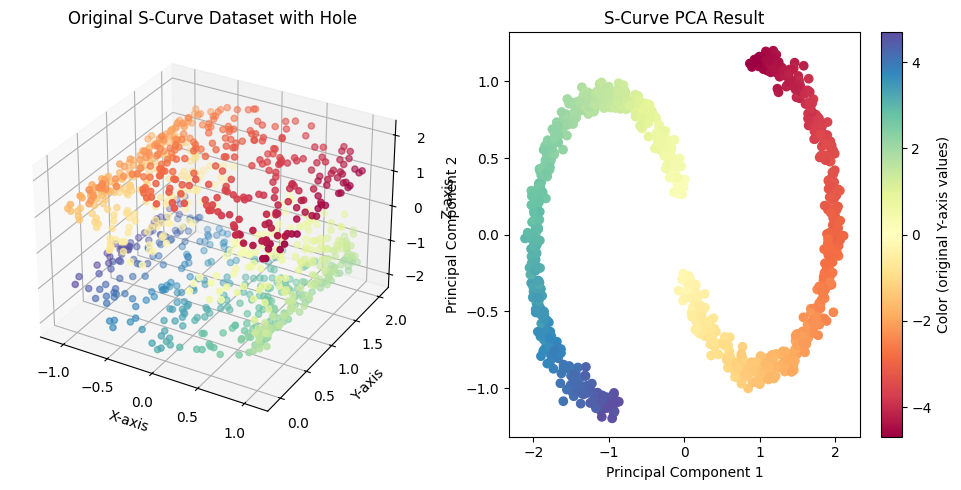

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_s_curve
from sklearn.decomposition import PCA

# Generate the S-Curve dataset
n_points = 1000
X, color = make_s_curve(n_points, noise=0.05)

# Create a hole by removing points within a specific range
# Adjust the condition to only remove a central portion of the S
hole_condition = (X[:, 0] > -0.25) & (X[:, 0] < 0.25) & (X[:, 2] > -0.5) & (X[:, 2] < 0.5)
X_with_hole = X[~hole_condition]
color_with_hole = color[~hole_condition]

# Visualize the corrected 3D S-Curve with the hole
fig = plt.figure(figsize=(10, 5))

# 3D plot of the S-Curve
ax = fig.add_subplot(121, projection="3d")
ax.scatter(X_with_hole[:, 0], X_with_hole[:, 1], X_with_hole[:, 2], c=color_with_hole, cmap=plt.cm.Spectral)
ax.set_title("Original S-Curve Dataset with Hole")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

# Apply PCA for dimensionality reduction to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_with_hole)

# 2D plot of PCA results
ax2 = fig.add_subplot(122)
sc = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=color_with_hole, cmap=plt.cm.Spectral)
ax2.set_title("S-Curve PCA Result")
ax2.set_xlabel("Principal Component 1")
ax2.set_ylabel("Principal Component 2")
plt.colorbar(sc, ax=ax2, label="Color (original Y-axis values)")

plt.tight_layout()
plt.show()


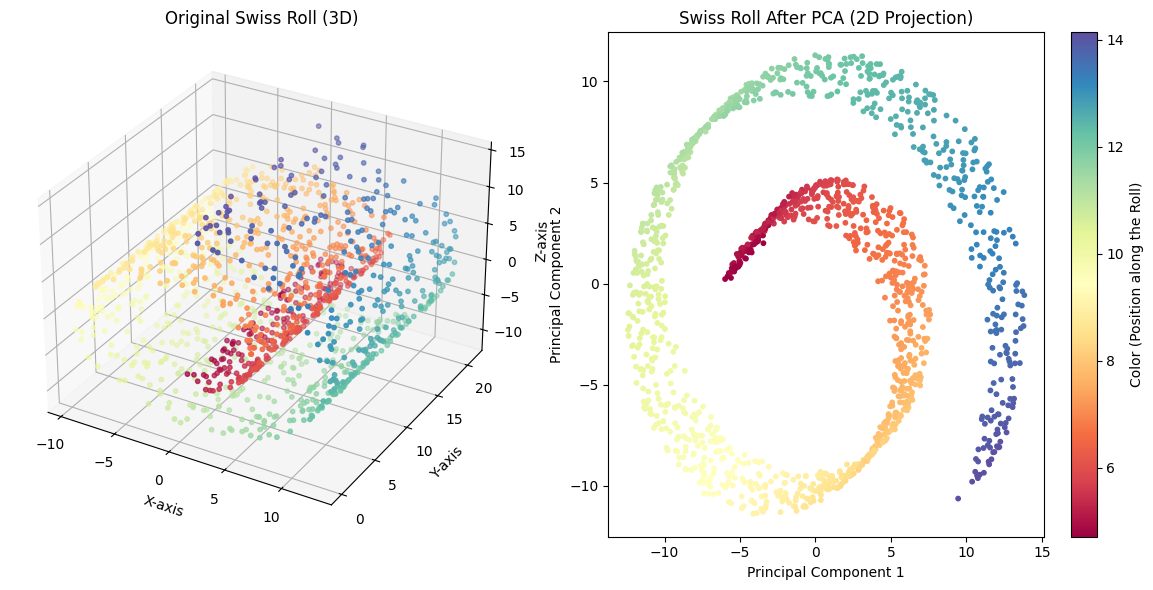

In [ ]:
from sklearn.datasets import make_swiss_roll

# Generate the Swiss Roll dataset
n_points = 1500
X, color = make_swiss_roll(n_points, noise=0.05)

# Visualize the original 3D Swiss Roll
fig = plt.figure(figsize=(12, 6))

# 3D plot of the original data
ax1 = fig.add_subplot(121, projection='3d')
sc = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral, s=10)
ax1.set_title("Original Swiss Roll (3D)")
ax1.set_xlabel("X-axis")
ax1.set_ylabel("Y-axis")
ax1.set_zlabel("Z-axis")

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize the PCA result in 2D
ax2 = fig.add_subplot(122)
sc2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=color, cmap=plt.cm.Spectral, s=10)
ax2.set_title("Swiss Roll After PCA (2D Projection)")
ax2.set_xlabel("Principal Component 1")
ax2.set_ylabel("Principal Component 2")

plt.colorbar(sc2, ax=ax2, label="Color (Position along the Roll)")
plt.tight_layout()
plt.show()


/tmp/ipykernel_132570/509483123.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


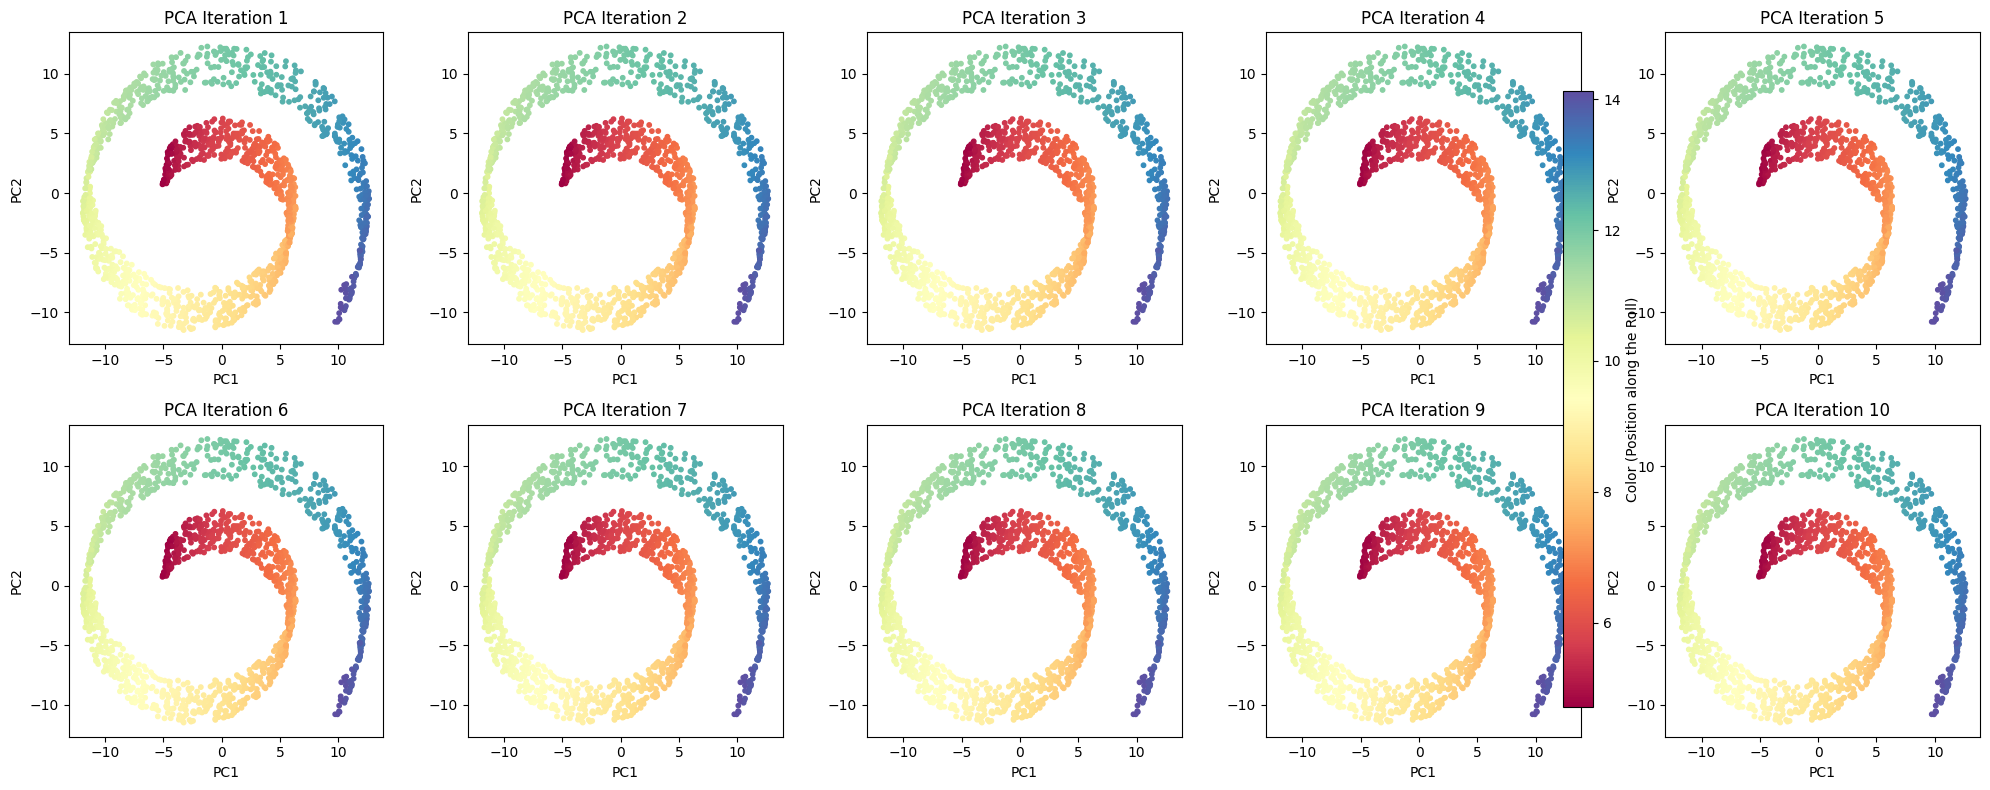

In [ ]:
# Generate the Swiss Roll dataset
n_points = 1500
X, color = make_swiss_roll(n_points, noise=0.05)

# Perform PCA for 10 iterations and visualize the results
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

for i in range(10):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Plot each iteration
    ax = axes[i // 5, i % 5]
    sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=color, cmap=plt.cm.Spectral, s=10)
    ax.set_title(f"PCA Iteration {i + 1}")
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")

# Add a single colorbar for consistency across plots
fig.colorbar(sc, ax=axes[:, :], location="right", label="Color (Position along the Roll)")
plt.tight_layout()
plt.show()

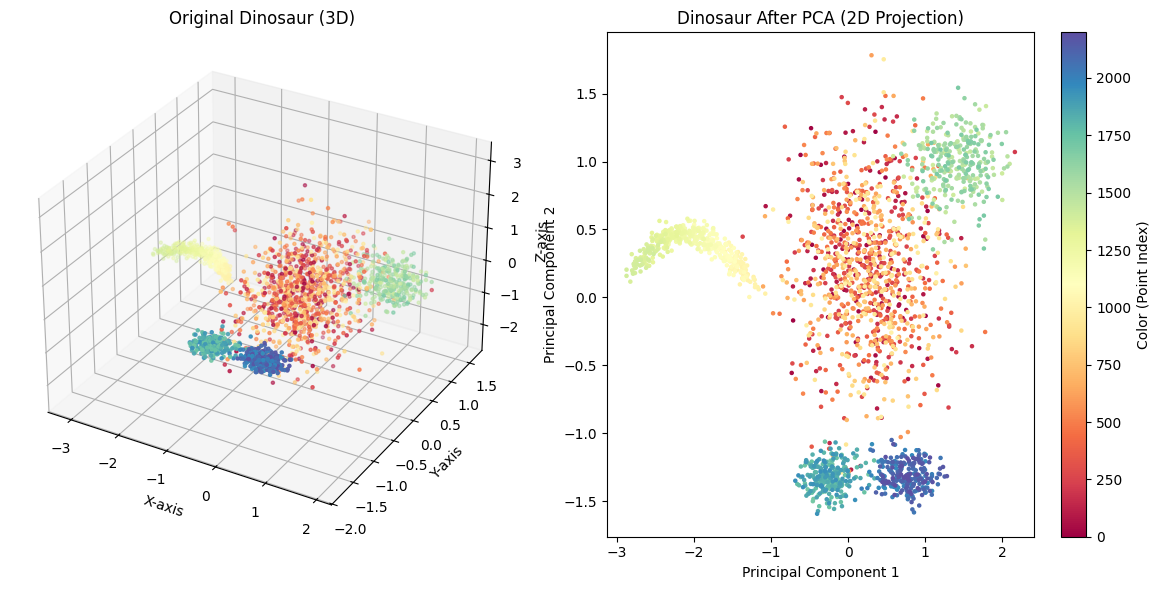

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Generate a synthetic dinosaur dataset
def generate_dinosaur_dataset():
    np.random.seed(42)
    # Body (Elliptical shape)
    body_x = np.random.normal(0, 0.5, 1000)
    body_y = np.random.normal(0, 0.5, 1000)
    body_z = np.random.normal(0, 0.8, 1000)  # Adding a 3D effect
    body = np.vstack((body_x, body_y, body_z)).T

    # Tail (curved line)
    tail_x = np.linspace(-1.5, -3, 400) + np.random.normal(0, 0.1, 400)
    tail_y = np.sin(tail_x * 2) * 0.3 + np.random.normal(0, 0.05, 400)
    tail_z = np.random.normal(0, 0.1, 400)
    tail = np.vstack((tail_x, tail_y, tail_z)).T

    # Head
    head_x = np.random.normal(1.2, 0.3, 300)
    head_y = np.random.normal(0.8, 0.2, 300)
    head_z = np.random.normal(0, 0.3, 300)
    head = np.vstack((head_x, head_y, head_z)).T

    # Legs
    leg1_x = np.random.normal(-0.5, 0.2, 250)
    leg1_y = np.random.normal(-1.5, 0.1, 250)
    leg1_z = np.random.normal(0, 0.1, 250)

    leg2_x = np.random.normal(0.5, 0.2, 250)
    leg2_y = np.random.normal(-1.5, 0.1, 250)
    leg2_z = np.random.normal(0, 0.1, 250)

    leg1 = np.vstack((leg1_x, leg1_y, leg1_z)).T
    leg2 = np.vstack((leg2_x, leg2_y, leg2_z)).T
    legs = np.vstack((leg1, leg2))

    # Combine all parts
    dinosaur = np.vstack((body, tail, head, legs))
    colors = np.arange(dinosaur.shape[0])  # Gradient coloring by index
    return dinosaur, colors

# Create the dinosaur dataset
X, color = generate_dinosaur_dataset()

# Visualize the 3D dinosaur
fig = plt.figure(figsize=(12, 6))

# 3D scatter plot of the original dinosaur
ax1 = fig.add_subplot(121, projection="3d")
sc = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral, s=5)
ax1.set_title("Original Dinosaur (3D)")
ax1.set_xlabel("X-axis")
ax1.set_ylabel("Y-axis")
ax1.set_zlabel("Z-axis")

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize the PCA result in 2D
ax2 = fig.add_subplot(122)
sc2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=color, cmap=plt.cm.Spectral, s=5)
ax2.set_title("Dinosaur After PCA (2D Projection)")
ax2.set_xlabel("Principal Component 1")
ax2.set_ylabel("Principal Component 2")

plt.colorbar(sc2, ax=ax2, label="Color (Point Index)")
plt.tight_layout()
plt.show()